In [1]:
# Load autoreload extension
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim
import torch.nn.functional as F

plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{mathtools}")
plt.rc("font", size=10, family="serif", serif="cm")
plt.rc("figure", figsize=(1.8, 1.5))

In [3]:
def gaussian_mgf(t, a, b):
    out = torch.exp(a * t) * torch.exp(((b * t) ** 2) / 2)
    return out

In [19]:
def plot(t, std, bia, a, b, real, clip=None, savename=None, verbose=False):
    if real:
        z = gaussian_mgf(t, std, bia)
        z -= gaussian_mgf(t, a, b)
        loss = torch.mean(z**2, dim=0)
    else:
        z = gaussian_mgf(1j * t, std, bia)
        z -= gaussian_mgf(1j * t, a, b)
        # loss = torch.mean(z.real**2, dim=0) + torch.mean(z.imag**2, dim=0)
        loss = torch.sum(z.real**2, dim=0) + torch.sum(z.imag**2, dim=0)

    if verbose:
        return loss

    Z = np.clip(loss.numpy(), 0, clip)
    X, Y = np.meshgrid(bia.numpy().squeeze(), std.numpy().squeeze())

    fig, ax = plt.subplots()
    c = plt.contourf(X, Y, Z)
    ax.set_xlabel("Bias")
    ax.set_ylabel("Std")
    fig.colorbar(c)
    # if savename is not None:
    #     fig.savefig(savename, bbox_inches="tight")

In [20]:
a, b = 3, 5
nb_params = 100

real = True
t = torch.linspace(0, .1, 100).view(-1, 1, 1)

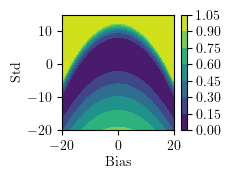

In [21]:
# Compute outputs for different parameters
std = torch.linspace(-20, 15, nb_params).view(1, -1, 1)
bia = torch.linspace(-20, 20, 2*nb_params).view(1, 1, -1)
save_name = f"gau_{real}_coarse.pdf"
plot(t, std, bia, a, b, real, clip=1e0, savename=save_name)

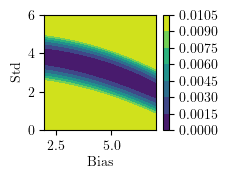

In [22]:
std = torch.linspace(a - 3, a + 3, nb_params).view(1, -1, 1)
bia = torch.linspace(b - 3, b + 2, 2*nb_params).view(1, 1, -1)
save_name = f"gau_{real}_med.pdf"
plot(t, std, bia, a, b, real, clip=1e-2, savename=save_name)

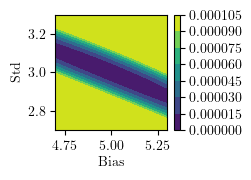

In [23]:
std = torch.linspace(a - .3, a + .3, nb_params).view(1, -1, 1)
bia = torch.linspace(b - .3, b + .3, 2*nb_params).view(1, 1, -1)
save_name = f"gau_{real}_fine.pdf"
plot(t, std, bia, a, b, real, clip=1e-4, savename=save_name)

In [43]:
real = False
t = torch.linspace(0, 1, 10).view(-1, 1, 1)

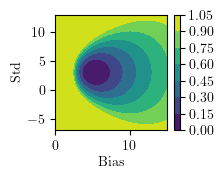

In [47]:
std = torch.linspace(a - 10, a + 10, nb_params).view(1, -1, 1)
bia = torch.linspace(b - 5, b + 10, 2*nb_params).view(1, 1, -1)
save_name = f"gau_{real}_coarse.pdf"
plot(t, std, bia, a, b, real, clip=1e0, savename=save_name)

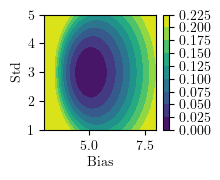

In [52]:
std = torch.linspace(a - 2, a + 2, nb_params).view(1, -1, 1)
bia = torch.linspace(b - 2, b + 3, 2*nb_params).view(1, 1, -1)
save_name = f"gau_{real}_med.pdf"
plot(t, std, bia, a, b, real, clip=2e-1, savename=save_name)

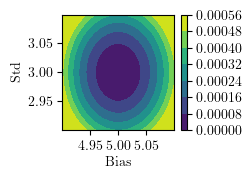

In [54]:
std = torch.linspace(a - .1, a + .1, nb_params).view(1, -1, 1)
bia = torch.linspace(b - .1, b + .1, 2*nb_params).view(1, 1, -1)
save_name = f"gau_{real}_fine.pdf"
plot(t, std, bia, a, b, real, clip=5e-4, savename=save_name)